In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Temporal Analysis
Temporal Analysis:  
- Explore temporal patterns in user sentiment over time using the "Timestamp"
column.  
- Identify recurring themes, seasonal variations, or any significant trends in the data.  




In [2]:
df = pd.read_csv("data.csv")
cols = ['Text', 'Sentiment', 'Timestamp', 'Likes', 'Retweets', 'Hashtags', 'Platform', 'Country']
df.head()

,Text,Sentiment,Timestamp,Likes,Retweets,Hashtags,Platform,Country
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,30.0,15.0,#Nature #Park,Twitter,USA
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,10.0,5.0,#Traffic #Morning,Twitter,Canada
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,40.0,20.0,#Fitness #Workout,Instagram,USA
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,15.0,8.0,#Travel #Adventure,Facebook,UK
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,25.0,12.0,#Cooking #Food,Instagram,Australia


In [3]:
df['Timestamp'].dtypes
# convert to datetime type
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour

In [4]:
df_sorted = df.sort_values('Timestamp',ascending=True)
df_sorted = df_sorted.reset_index(drop=True)
df_sorted.head()

,Text,Sentiment,Timestamp,Likes,Retweets,Hashtags,Platform,Country,Year,Month,Day,Hour
0,"Revisiting old memories, feeling a sense of e...",Elation,2010-05-15 15:30:00,40.0,20.0,#Elation #Memories,Twitter,Canada,2010,5,15,15
1,Contentment in the simplicity of a quiet Sund...,Contentment,2010-08-15 10:00:00,60.0,30.0,#Contentment #SundayMood,Twitter,Australia,2010,8,15,10
2,Contentment in the embrace of a loved one. ...,Contentment,2010-11-12 20:20:00,60.0,30.0,#Contentment #Love,Twitter,India,2010,11,12,20
3,"Embracing the beauty of nature, a moment of c...",Contentment,2011-06-20 14:45:00,50.0,25.0,#Contentment #Nature,Facebook,India,2011,6,20,14
4,Serenity found in the beauty of a sunset by t...,Serenity,2011-07-22 18:30:00,45.0,22.0,#Serenity #SunsetViews,Instagram,Canada,2011,7,22,18


In [5]:
df_sorted['Year'].value_counts().sort_index()

,count
Year,
2010,3
2011,4
2012,4
2013,4
2014,4
2015,19
2016,38
2017,43
2018,56


In [6]:
df_sorted['Sentiment'].unique()

array(['Elation', 'Contentment', 'Serenity', 'Fulfillment', 'Gratitude',
       'Hope', 'Empowerment', 'Miscalculation', 'Grief', 'Suspense',
       'Compassion', 'Marvel', 'ArtisticBurst', 'Creativity',
       'Determination', 'Curiosity', 'Happy', 'Runway Creativity',
       'Satisfaction', 'Bitterness', 'Envisioning History', 'Tenderness',
       'Whimsy', 'Despair', 'Awe', 'Pride', 'Connection', 'Solitude',
       'Loneliness', 'Disgust', 'Contemplation', 'Darkness', 'Pressure',
       'Harmony', 'Positivity', 'Celestial Wonder', 'Boredom',
       'Appreciation', 'Inspiration', 'LostLove', 'Exploration',
       'Nostalgia', 'Betrayal', 'Resentment', 'Frustration', 'Melancholy',
       'Envy', 'Joy', 'Thrilling Journey', 'Regret', 'Arousal',
       'Obstacle', 'Wonderment', 'EmotionalStorm', 'Heartbreak',
       'Desolation', 'Captivation', 'InnerJourney', 'Mindfulness',
       'Reverence', 'Calmness', 'Success', 'Spark', 'Jealous',
       'Empathetic', 'Happiness', 'Enthusiasm', 'D

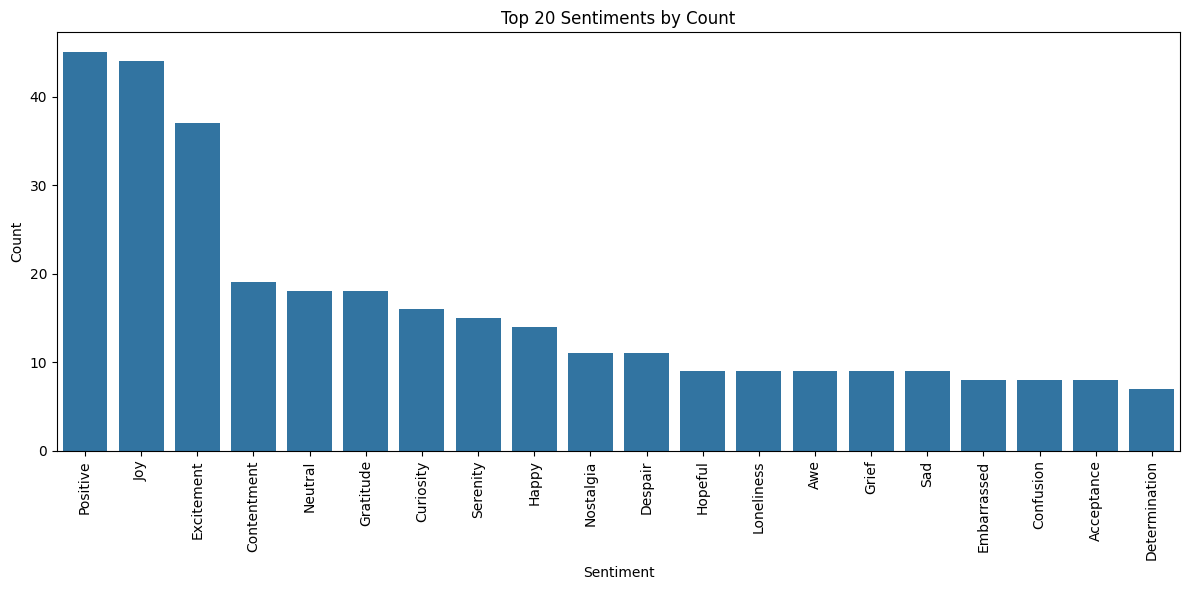

In [7]:
sentiment_counts = df_sorted['Sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']
sentiment_counts = sentiment_counts.head(20)

plt.figure(figsize=(12,6))
sns.barplot(data=sentiment_counts, x='Sentiment', y='Count')
plt.xticks(rotation=90)
plt.title("Top 20 Sentiments by Count")
plt.tight_layout()
plt.show()

In [8]:
top20 = sentiment_counts['Sentiment']
df_top = df_sorted[df_sorted['Sentiment'].isin(top20)]
sentiment_yearly = df_top.groupby(['Year', 'Sentiment']).size().unstack(fill_value=0)


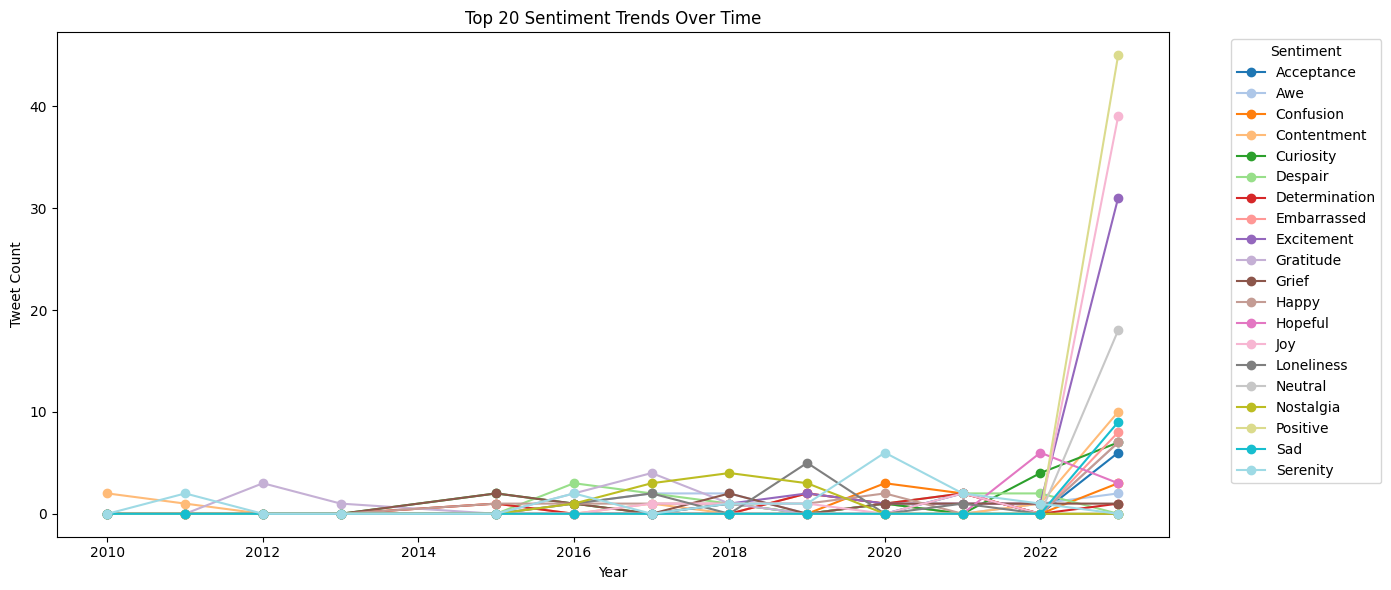

In [9]:
# random color
palette = sns.color_palette("tab20", n_colors=20)
# plt.figure(figsize=(14, 6))
sentiment_yearly.plot(kind='line', marker='o',figsize=(14,6), color=palette)
plt.title("Top 20 Sentiment Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Tweet Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Sentiment")
plt.tight_layout()
plt.show()


We can observe a noticeable spike in most sentiments in 2023. However, this trend is likely influenced by the varying sample sizes across years. While there are 289 observations in 2023, the previous five years each have only around 60 observations, and even fewer before 2017. Therefore, the apparent increase may be partly due to undersampling in earlier years.

Nevertheless, focusing solely on 2023, the top three sentiments are Positive, Joy, and Excitement.

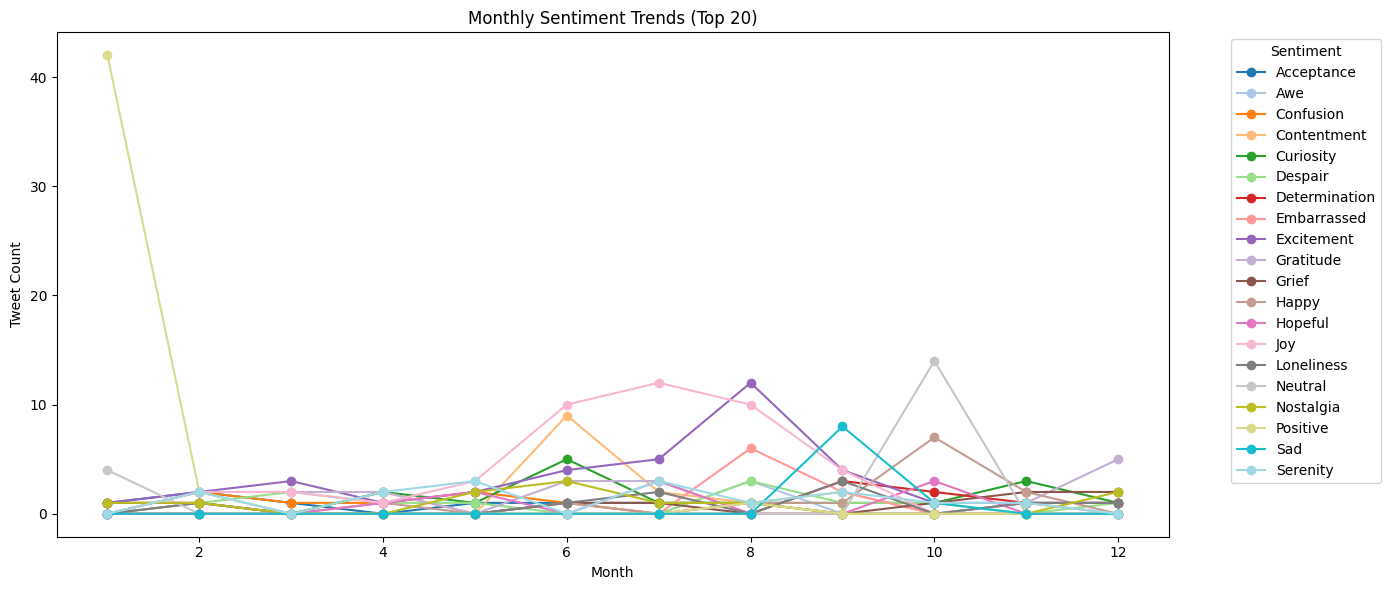

In [10]:
# monthly trend of top 20 sentiments
monthly_trend = df_top.groupby(['Month', 'Sentiment']).size().unstack(fill_value=0)

# plt.figure(figsize=(14, 6))
monthly_trend.plot(figsize=(14, 6), marker='o', color=palette)
plt.title("Monthly Sentiment Trends (Top 20)")
plt.xlabel("Month")
plt.ylabel("Tweet Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Sentiment")
plt.tight_layout()
plt.show()

The most noticeable pattern is the spike in Positive sentiment in January, likely due to the start of a new year.
Joy and Excitement gradually increase through the summer months (June–August), potentially reflecting holiday season and social activities.
Sadness and Loneliness show mild increases during the fall months, possibly tied to seasonal emotional shifts.

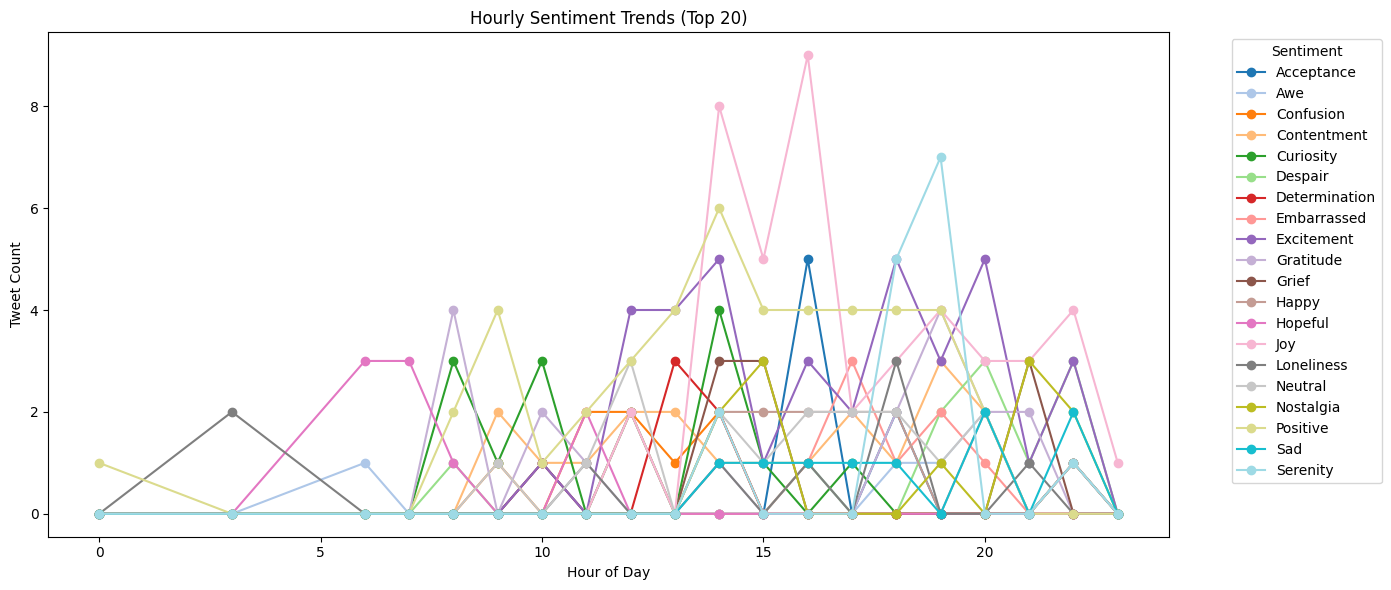

In [11]:
# daily trend of top 20 sentiments
hourly_trend  = df_top.groupby(['Hour', 'Sentiment']).size().unstack(fill_value=0)
hourly_trend.plot(figsize=(14, 6), marker='o', color=palette)
plt.title("Hourly Sentiment Trends (Top 20)")
plt.xlabel("Hour of Day")
plt.ylabel("Tweet Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Sentiment")
plt.tight_layout()
plt.show()

Most of the top 20 sentiments are more active in the afternoon and early evening hours (1–8 PM), with Joy, Positive, and Excitement showing clear spikes around 3–5 PM.
Early morning hours (0–8 AM) show significantly lower sentiment activity overall, although some emotions like Loneliness occasionally appear during this time.